Student Name:Ganapathy
Student ID:18202799

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [63]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

a_x = 0.05
a_y= 10

data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
data.shape

(20, 2)

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [64]:
class my_pca:
    a_x = 0.05
    a_y = 10

    def __init__(self, n_components):
        self.n_components = n_components
        self.call_data()
    def call_data(self):
        self.data = np.array([[n*(1+a_x*(rand.random()-0.5)), 4*n + a_y * (rand.random()-0.5)] for n in range(20)])
        print("Data:", self.data ,"\n")
        print("Data.Shape:", self.data.shape, "\n")
    def fit(self):
        mean = np.mean(self.data.T,axis=1)
        #calculate Mean using NUMPY
        print("Mean:", mean, "\n")

        #calculate the center Matrix using NUMPY
        self.center = self.data - mean
        print("center:", self.center, "\n")

        #calculate the covariance Matrix using NUMPY
        covar_matrix = np.cov(self.center.T)
        print("Covariance:", covar_matrix, "\n")

        ## calculate the eigen vectors and eigen values using NUMPY
        eigen_values, eig_vector_matrix = eig(covar_matrix)        
        sorted_eigen_values_indexes = eigen_values.argsort()[::-1]
        sorted_eigen_values = eigen_values[sorted_eigen_values_indexes]
        sorted_eigen_vectors = eig_vector_matrix[sorted_eigen_values_indexes] 
        self.eigen_values = sorted_eigen_values[:self.n_components]
        self.eig_vector_matrix = sorted_eigen_vectors[:self.n_components]
        print ("\neigen_values")
        print (self.eigen_values)
        print ("\neigen_vectors")
        print (self.eig_vector_matrix)

        ##Project the data
        data_projection = self.eig_vector_matrix.T.dot(self.center.T)
        print("Data Projection", data_projection, "\n")
    def scifi_kit(self):
        ##Create the PCA Instance using SKlean Module
        pca = PCA(self.n_components)

        #Fit the data using SKlean Module
        pca.fit(self.data)

        #Eigen Values & Vectors using SKlean Module
        print("Eigen Values using SciFiKit:", pca.explained_variance_, "\n")
        print("Eigen Vectors using SciFiKit:", pca.components_, "\n")
        
        #Transform the data using SKlean Module
        print("Data Projection using SciFiKit:", pca.transform(self.data), "\n" )

        # plot data using Matlab
        plt.plot(self.data[:,0],self.data[:,1],'go')
        if (self.n_components == 2):
            plt.plot(pca.transform(self.data)[:,0],pca.transform(self.data)[:,1],'or')
        plt.show()

Data: [[ 0.          2.89887304]
 [ 0.98027721  7.11465012]
 [ 2.04642226  6.37271902]
 [ 3.04431072 13.9912005 ]
 [ 3.92197351 15.03634258]
 [ 4.91645067 24.90590508]
 [ 5.8669131  19.26795352]
 [ 6.86703703 30.41267662]
 [ 7.98312058 33.95166574]
 [ 8.7806296  37.73415583]
 [ 9.9070657  43.86507342]
 [10.7435687  40.09565799]
 [11.91599897 45.05491422]
 [12.86187531 48.95889435]
 [13.90367694 54.25706326]
 [15.03946185 58.13134127]
 [15.96122418 61.11455955]
 [17.37090876 72.91583968]
 [17.90343777 67.60137356]
 [18.54398401 79.35267996]] 

Data.Shape: (20, 2) 

Mean: [ 9.42791684 38.15167697] 

center: [[ -9.42791684 -35.25280392]
 [ -8.44763963 -31.03702685]
 [ -7.38149458 -31.77895794]
 [ -6.38360612 -24.16047646]
 [ -5.50594333 -23.11533438]
 [ -4.51146617 -13.24577188]
 [ -3.56100374 -18.88372345]
 [ -2.56087982  -7.73900035]
 [ -1.44479627  -4.20001122]
 [ -0.64728724  -0.41752114]
 [  0.47914886   5.71339646]
 [  1.31565185   1.94398102]
 [  2.48808213   6.90323726]
 [  3.4339

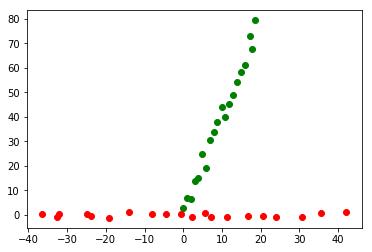


 scikitlearn PCA using number of components  1
Data: [[ 0.         -0.88309063]
 [ 0.98962543  4.84980121]
 [ 1.99097831 11.27471742]
 [ 3.02745199 15.26299142]
 [ 3.90315583 16.78940115]
 [ 5.0166196  15.06455863]
 [ 5.90939106 27.83054411]
 [ 6.84985732 32.67072699]
 [ 7.86660541 33.38657667]
 [ 9.16039597 35.59783594]
 [ 9.84594368 36.80265543]
 [10.90035123 45.90157384]
 [12.1875795  44.79292796]
 [12.86410847 52.75924621]
 [13.82874179 52.73841167]
 [15.2015757  63.9255811 ]
 [16.01262178 60.0467422 ]
 [17.27112119 67.71938899]
 [18.13491343 74.05634511]
 [18.98527069 73.10062504]] 

Data.Shape: (20, 2) 

Eigen Values using SciFiKit: [566.28207542] 

Eigen Vectors using SciFiKit: [[-0.24864316 -0.96859516]] 

Data Projection using SciFiKit: [[ 40.20200346]
 [ 34.4030886 ]
 [ 27.93096632]
 [ 23.81023136]
 [ 22.11402051]
 [ 23.50783947]
 [ 10.92078624]
 [  5.99876804]
 [  5.05259205]
 [  2.58908485]
 [  1.25164578]
 [ -7.82369375]
 [ -7.06992522]
 [-14.95427681]
 [-15.17394606]
 [-

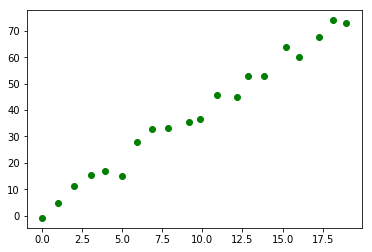


 scikitlearn PCA using number of components  2
Data: [[ 0.         -1.37060796]
 [ 1.01634531  3.31201447]
 [ 2.0365469   5.81029241]
 [ 3.02007917  9.18801256]
 [ 3.91117105 18.51288893]
 [ 4.90619841 20.82562793]
 [ 5.9378657  20.03038312]
 [ 7.05311256 29.43635849]
 [ 7.99837446 36.18744875]
 [ 9.12620129 31.15695792]
 [ 9.9547903  38.80282957]
 [11.27185578 46.57004667]
 [12.28080127 45.79569482]
 [12.83323447 55.9144113 ]
 [14.24148721 59.34132397]
 [15.03754108 55.79245851]
 [16.08027071 64.72089844]
 [17.38878278 68.54172355]
 [18.25420215 74.56672188]
 [18.59600195 75.37905787]] 

Data.Shape: (20, 2) 

Eigen Values using SciFiKit: [6.32358296e+02 4.32072698e-01] 

Eigen Vectors using SciFiKit: [[-0.23539785 -0.9718991 ]
 [ 0.9718991  -0.23539785]] 

Data Projection using SciFiKit: [[ 4.04394731e+01 -2.86840611e-02]
 [ 3.56491911e+01 -1.43178239e-01]
 [ 3.29809637e+01  2.60265499e-01]
 [ 2.94666392e+01  4.21051561e-01]
 [ 2.01940392e+01 -9.07952922e-01]
 [ 1.77120629e+01 -4.853

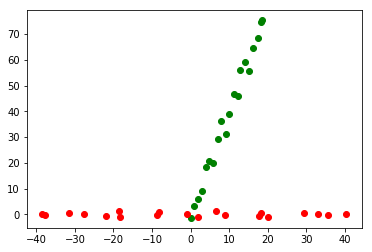

In [65]:
pca = my_pca(2)
pca.fit()
pca.scifi_kit()
ncomponents = 1, 2
for n in ncomponents:
    print ("\n scikitlearn PCA using number of components ", n)
    pca1 = my_pca(n)
    pca1.scifi_kit()